# EDA

This file explores the 2015 flights data collected by the department of transportation in 2015. The EDA focuses only on flights not cancelled or d

## Import Statements & df construction

In [ ]:
# Cell to import all statements needed for the file
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os

In [55]:
# Read the Flights csv. Remove all cancellation and diverted data and focus only on Boston for EDA
# Files are zipped to comply with github filesize requirements
if(os.path.isfile('../Data/Boston_Flights_EDA.csv')):
    df = pd.read_csv('../Data/Boston_Flights_EDA.csv')
else:
    df = pd.read_csv('../Data/flights.csv')
    df = df[df['ORIGIN_AIRPORT'] == 'BOS']
    df = df[df['CANCELLED'] == 0]
    df = df[df['DIVERTED'] == 0]
    df = df.drop(['CANCELLED', 'DIVERTED', 'CANCELLATION_REASON', 'YEAR', 'ORIGIN_AIRPORT'], axis = 1)
    df.to_csv('../Data/Boston_Flights_EDA.csv')


In [47]:
# Print shape and dtypes of data
print(df.shape)
print(df.dtypes)

(104804, 28)
Unnamed: 0.1             int64
Unnamed: 0               int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object


## Total Flights EDA

In [5]:
# Correct order for months and airline for the follow graphs
correct_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
correct_order_airline = ['B6', 'AA', 'DL', 'UA', 'WN', 'US', 'EV', 'NK', 'VX', 'AS', 'OO']

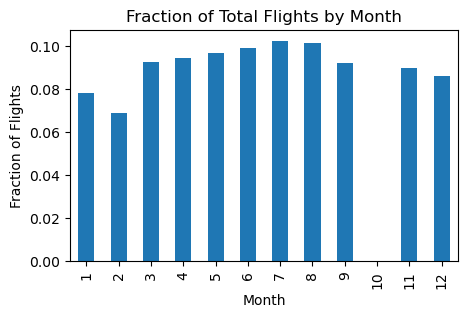

In [17]:
# Fraction of Total Flights by Month
plt.figure(figsize=(5,3))
pd.value_counts(df['MONTH'], normalize=True).reindex(correct_order).plot.bar()
plt.ylabel('Fraction of Flights')
plt.xlabel('Month')
plt.title("Fraction of Total Flights by Month")
plt.savefig('../figures/Fraction_Total_Flights_by_Month', dpi=300, bbox_inches="tight")
plt.show()

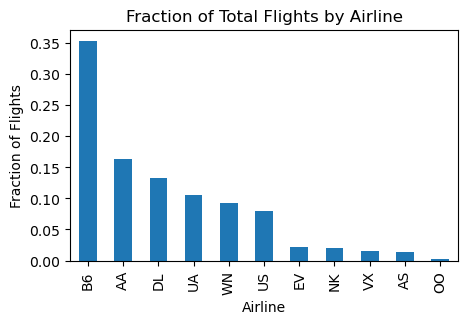

In [18]:
# Fraction of Total Flights by Airline
plt.figure(figsize=(5,3))
pd.value_counts(df['AIRLINE'], normalize=True).plot.bar()
plt.ylabel('Fraction of Flights')
plt.xlabel('Airline')
plt.title("Fraction of Total Flights by Airline")
plt.savefig('../figures/Fraction_Total_Flights_by_Airline', dpi=300, bbox_inches="tight")
plt.show()

## On Time/Early Arrival vs Delayed EDA

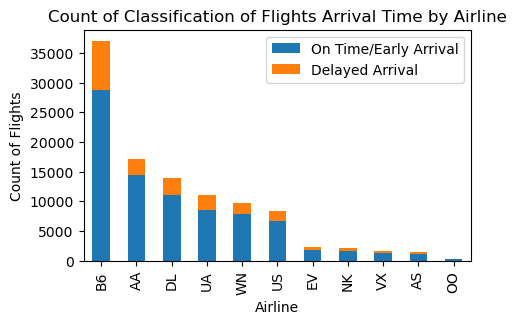

In [19]:
# Stacked bar graphs showing delays based on airline
df_temp = df.copy()
df_temp.loc[df['ARRIVAL_DELAY'] < 15, 'ARRIVAL_DELAY'] = -1
df_temp.loc[df['ARRIVAL_DELAY'] >= 15, 'ARRIVAL_DELAY'] = 1 # Delay defined by being 15 minutes or more late

count_matrix = df_temp.groupby(['AIRLINE', 'ARRIVAL_DELAY']).size().unstack()
# print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# print(count_matrix_norm)

count_matrix.reindex(correct_order_airline).plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('Count of Flights')
plt.xlabel('Airline')
plt.title('Count of Classification of Flights Arrival Time by Airline')
mylabels = ['On Time/Early Arrival', 'Delayed Arrival']
plt.legend(loc=1, labels=mylabels)
plt.savefig('../figures/DelayedCounts_by_Airline', dpi=300, bbox_inches="tight")
plt.show()

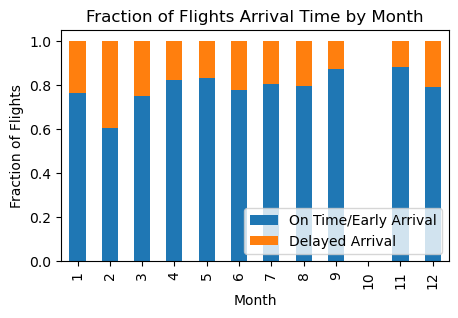

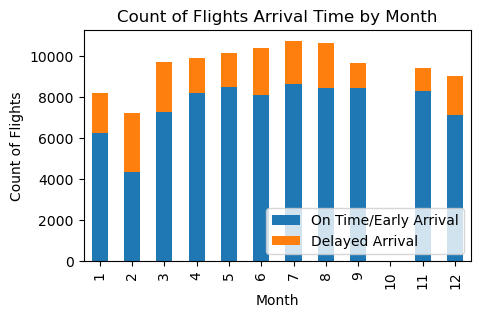

In [20]:
# Stacked bar graph shwoing delays based on month
count_matrix = df_temp.groupby(['MONTH', 'ARRIVAL_DELAY']).size().unstack()
# print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# print(count_matrix_norm)

count_matrix_norm.reindex(correct_order).plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('Fraction of Flights')
plt.xlabel('Month')
mylabels = ['On Time/Early Arrival', 'Delayed Arrival']
plt.title('Fraction of Flights Arrival Time by Month')
plt.legend(loc=4, labels=mylabels)
plt.savefig('../figures/Fraction_Arrival_Month', dpi=300, bbox_inches="tight")
plt.show()

count_matrix.reindex(correct_order).plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('Count of Flights')
plt.xlabel('Month')
mylabels = ['On Time/Early Arrival', 'Delayed Arrival']
plt.title('Count of Flights Arrival Time by Month')
plt.legend(loc=4, labels=mylabels)
plt.savefig('../figures/Count_Arrival_Month', dpi=300, bbox_inches="tight")
plt.show()

## Misc EDA

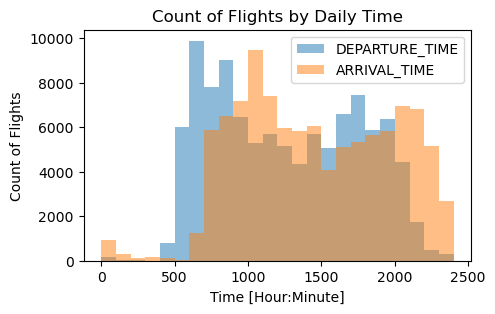

In [21]:
# Overlayed bar graph showing departure and arrival times
categories = ['DEPARTURE_TIME', 'ARRIVAL_TIME']
bin_range = (df['DEPARTURE_TIME'].min(),df['DEPARTURE_TIME'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[c],alpha=0.5,label=c,range=bin_range,bins=24)
plt.legend()
plt.ylabel('Count of Flights')
plt.xlabel('Time [Hour:Minute]')
plt.title('Count of Flights by Daily Time')
plt.savefig('../figures/Arrival_Departure_Time', dpi=300, bbox_inches="tight")
plt.show()


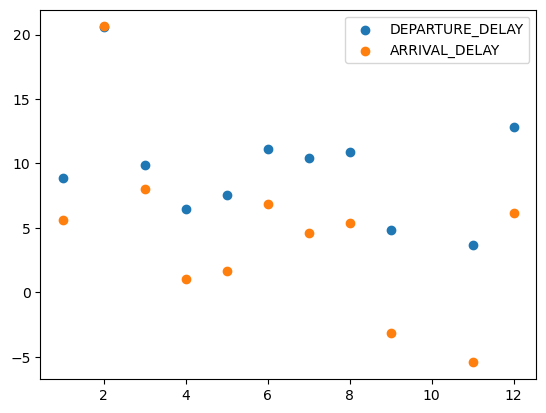

In [24]:
# Dot plot showing average departure and arrival delay per month
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
lines = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY']
line1 = []
line2 = []
for i in months:
    temp = df[df['MONTH'] == i]
    line1.append(temp['DEPARTURE_DELAY'].mean())
    line2.append(temp['ARRIVAL_DELAY'].mean())

plt.scatter(months, line1)
plt.scatter(months, line2)
plt.legend(lines)
plt.savefig('../figures/Departure_Arrival_Scatter', dpi=300, bbox_inches="tight")
plt.show()

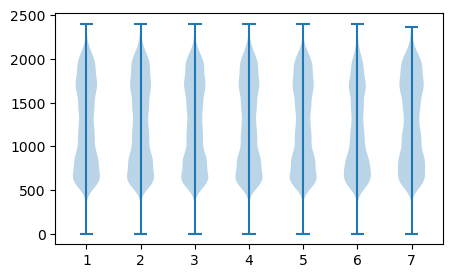

In [25]:
# Violin plot showing departure time per day of thre week
dataset = [df[df['DAY_OF_WEEK']== 1]['DEPARTURE_TIME'].values,
           df[df['DAY_OF_WEEK']== 2]['DEPARTURE_TIME'].values,
           df[df['DAY_OF_WEEK']== 3]['DEPARTURE_TIME'].values,
           df[df['DAY_OF_WEEK']== 4]['DEPARTURE_TIME'].values,
           df[df['DAY_OF_WEEK']== 5]['DEPARTURE_TIME'].values,
           df[df['DAY_OF_WEEK']== 6]['DEPARTURE_TIME'].values,
           df[df['DAY_OF_WEEK']== 7]['DEPARTURE_TIME'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset)
plt.savefig('../figures/DepartureTime_Day_Of_Week', dpi=300, bbox_inches="tight")
plt.show()

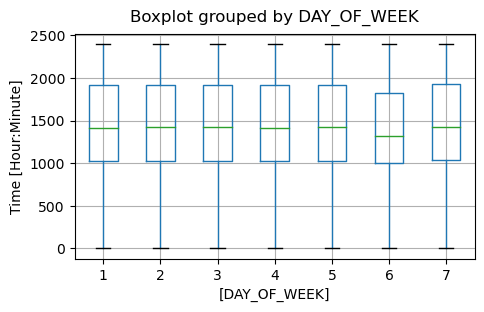

In [30]:
# Box plot showing average Arrival time depending on day of the week


df[['DAY_OF_WEEK','ARRIVAL_TIME']].boxplot(by='DAY_OF_WEEK',figsize=(5,3))
plt.ylabel('Time [Hour:Minute]')
plt.title("")
plt.savefig('../figures/ArrivalTime_Day_Of_Week', dpi=300, bbox_inches="tight")
plt.show()

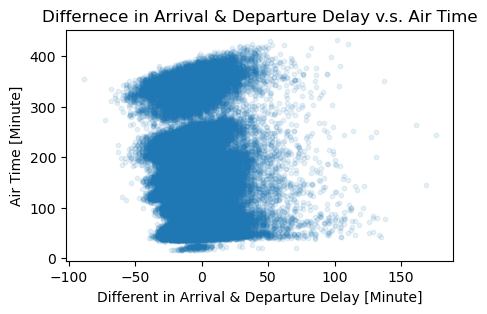

In [31]:
# Scatter plot looking at whether we make up time while flying
col = df['ARRIVAL_DELAY'] - df['DEPARTURE_DELAY']
df_pl = df.copy()
df_pl['DIFF'] = col

df_pl.plot.scatter('DIFF','AIR_TIME',figsize=(5,3),alpha=0.1,s=10) # alpha=0.1,s=10
plt.xlabel('Different in Arrival & Departure Delay [Minute]')
plt.ylabel("Air Time [Minute]")
plt.title("Differnece in Arrival & Departure Delay v.s. Air Time")
plt.savefig('ArrivalDelay_DepartureDelay_Difference', dpi=300, bbox_inches="tight")
plt.show()

## Top 10 Destination Airport Average Arrival Delay

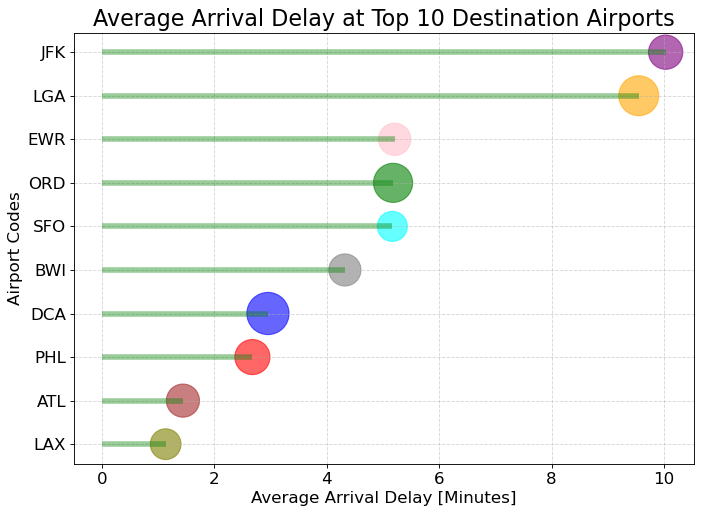

In [32]:
# Horizontal Line plot showing average delay at top 10 most frequent destination airports
airport = df['DESTINATION_AIRPORT'].value_counts()[0:10]
aa = []
for i in airport:
    aa.append(i/np.sum(airport)*10000)
    
top_airports = ['DCA', 'LGA', 'ORD', 'PHL', 'JFK', 'ATL', 'EWR', 'BWI', 'LAX', 'SFO']
mean_list = []
for i in top_airports:
    temp = df[df['DESTINATION_AIRPORT'] == i]
    mean_list.append(temp['ARRIVAL_DELAY'].mean())

df_bar = pd.DataFrame({'AIRPORT': top_airports})
df_bar['MEAN'] = mean_list
df_bar['colors'] = ['red' if x < 0 else 'green' for x in df_bar['MEAN']]
df_bar['colors2'] = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
df_bar['COUNT'] = aa
df_bar.sort_values('MEAN', inplace=True)
df_bar.reset_index(inplace=True)

# # # Draw plot
plt.figure(figsize=(10,7), dpi= 80)
plt.hlines(y=df_bar['AIRPORT'], xmin=0, xmax=df_bar.MEAN, color=df_bar.colors, alpha=0.4, linewidth=5)
plt.scatter(df_bar.MEAN, df_bar['AIRPORT'], color=df_bar.colors2, 
            s=df_bar['COUNT'], alpha=0.6)
    

# # Decorations
plt.title('Average Arrival Delay at Top 10 Destination Airports', fontdict={'size':20})
plt.ylabel("Airport Codes", fontdict={'size':15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Average Arrival Delay [Minutes]", fontdict={'size':15})
plt.grid(linestyle='--', alpha=0.5)
plt.savefig('../figures/Average_Arrival_Delay_Airport', dpi=300, bbox_inches="tight")
plt.show()